# **Estimation of Obesity Levels Based On Eating Habits and Physical Condition**

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

### **Step 1 : Import Libraries**

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,classification_report

### **Step 2 : Getting Dataset**

we will use uci for datasets you can download datasets or get by ucimlrepo 
- `pip install ucimlrepo`
- download : https://archive.ics.uci.edu/static/public/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip

In [ ]:
datasets = fetch_ucirepo(id=544)

In [38]:
datasets.keys()

dict_keys(['data', 'metadata', 'variables'])

In [39]:
datasets["variables"]

,name,role,type,demographic,description,units,missing_values
0,Gender,Feature,Categorical,Gender,None,None,no
1,Age,Feature,Continuous,Age,None,None,no
2,Height,Feature,Continuous,None,None,None,no
3,Weight,Feature,Continuous,None,None,None,no
4,family_history_with_overweight,Feature,Binary,None,Has a family member suffered or suffers from o...,None,no
5,FAVC,Feature,Binary,None,Do you eat high caloric food frequently?,None,no
6,FCVC,Feature,Integer,None,Do you usually eat vegetables in your meals?,None,no
7,NCP,Feature,Continuous,None,How many main meals do you have daily?,None,no
8,CAEC,Feature,Categorical,None,Do you eat any food between meals?,None,no
9,SMOKE,Feature,Binary,None,Do you smoke?,None,no


there is no missing values here

In [40]:
datasets["data"].keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [41]:
datasets["data"]["features"]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [42]:
datasets["data"]["original"]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [43]:
X = datasets["data"]["features"]
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


### **Step 3 : Preprocessing The Data**

In [44]:
# removing SCC columns 
X = X.drop(columns=["SCC"])

In [45]:
y = datasets["data"]["targets"]
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [46]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,0.0,0.0,Sometimes,Public_Transportation


In [54]:
# getting categorical data 
categorical_data = [col for col in X.columns if X[col].dtype == "object"]
numerical_data = [col for col in X.columns if X[col].dtype == "float64"]

In [55]:
categorical_data

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'CALC',
 'MTRANS']

In [56]:
numerical_data

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [69]:
le = LabelEncoder()
# covert to array using numpy and then create 1 D-array using flatten method 
y_labeled = le.fit_transform(np.array(y).flatten())

In [ ]:
transformer = ColumnTransformer(
    transformers=[
        ["categorical",OneHotEncoder(),categorical_data],
        ["numerical",StandardScaler(),numerical_data]
    ],
    remainder="passthrough"
)
transformer.fit(X)

,transformers,"[['categorical', OneHotEncoder(), ...], ['numerical', StandardScaler(), ...]]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [76]:
X_transforemd = transformer.transform(X)

### **Step 4 : Training The Model**

first we need to find n_cluster using elbow method 

In [79]:
wcss = []

for i in range (1,11) : 
    model = KMeans(n_clusters=i,init="k-means++",n_init=12,max_iter=12)
    model.fit(X_transforemd)
    print(model.inertia_)
    wcss.append(model.inertia_)

21510.591189009945
18634.44178188619
17002.21741422562
15536.3916955012
14383.293268537758
13497.727096290762
12852.150704109688
12451.05001921321
11993.121687032053
11571.122887651884


now we plot the wscc 

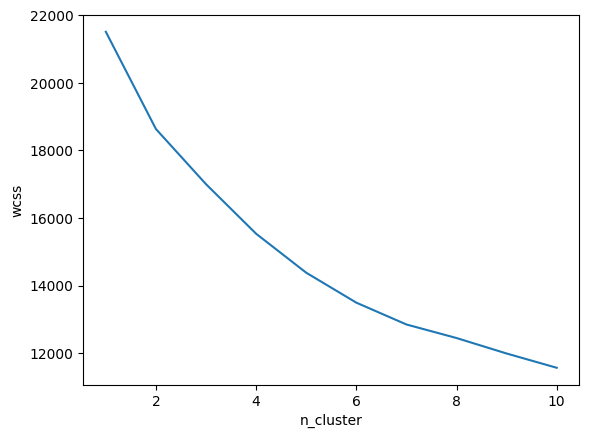

In [81]:
plt.plot(range(1,11),wcss)
plt.xlabel("n_cluster")
plt.ylabel("wcss")
plt.show()

n_cluster is 2

In [89]:
y.value_counts()

NObeyesdad         
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

we have 7 class in y label 

In [90]:
model_2_cluster = KMeans(n_clusters=2,init="k-means++",n_init=12,max_iter=12)
model_2_cluster.fit(X_transforemd)

,n_clusters,2
,init,'k-means++'
,n_init,12
,max_iter,12
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [92]:
# evaluation 
silhouette_score(X_transforemd,model_2_cluster.labels_)

0.1288665777004009

check score when we have 7 cluster

In [93]:
model_7_cluster = KMeans(n_clusters=7,init="k-means++",n_init=12,max_iter=12)
model_7_cluster.fit(X_transforemd)
silhouette_score(X_transforemd,model_7_cluster.labels_)

0.1522632929776253

In [102]:
print(classification_report(y_labeled,model_7_cluster.labels_))

              precision    recall  f1-score   support

           0       0.29      0.28      0.28       272
           1       0.32      0.32      0.32       287
           2       0.01      0.01      0.01       351
           3       0.20      0.18      0.19       297
           4       0.00      0.00      0.00       324
           5       0.09      0.12      0.10       290
           6       0.11      0.10      0.11       290

    accuracy                           0.14      2111
   macro avg       0.14      0.14      0.14      2111
weighted avg       0.14      0.14      0.14      2111

